# Exercise 2

This notebook shows how we can perform linear regression on a dataset.

We generate a noisy dataset:

In [7]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [8]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

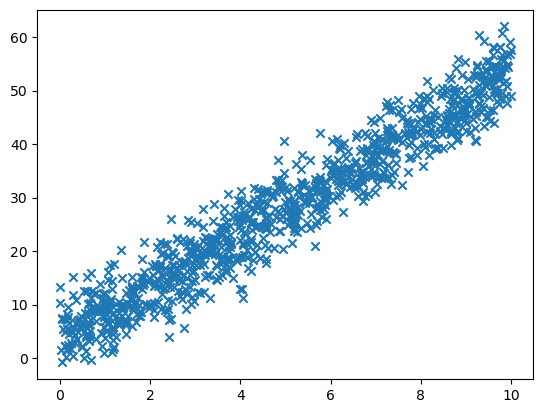

In [10]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient as in the previous notebook, but this time use the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:
 
```python
optimizer = optim.SGD([weights], lr=my_learning_rate)
   
# in the optimization loop:
optim.zero_grad() # equivalent to weights.grad.zero_()
# loss calculation here, then
optim.step() # equivalent to weights -= learning_rate*weights.grad
```

 In models with many weight tensors, using an optimizer is way easier than updating them all individually. Also, using different optimizers is as easy as using a different `torch.optim` class.

## Solution

Gradients after first iteration: tensor([[-366.0398],
        [ -56.3095]])
Iteration 0, Loss: 1030.599609375
Iteration 100, Loss: 15.244744300842285
Iteration 200, Loss: 15.041094779968262
Iteration 300, Loss: 14.966343879699707
Iteration 400, Loss: 14.938905715942383
Iteration 500, Loss: 14.9288330078125
Iteration 600, Loss: 14.925135612487793
Iteration 700, Loss: 14.92378044128418
Iteration 800, Loss: 14.9232816696167
Iteration 900, Loss: 14.923097610473633


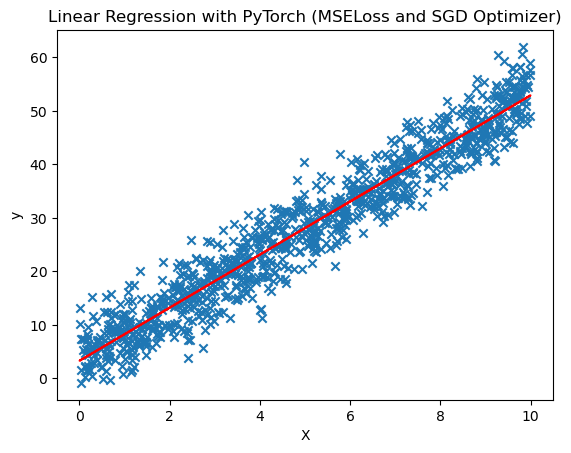

In [13]:

import torch
import torch.optim as optim
import torch.nn as nn


# Data generation
np.random.seed(0)
n_samples = 1000
X_numpy = np.random.rand(n_samples) * 10
X_numpy = np.expand_dims(X_numpy, axis=-1)
noise = np.random.randn(n_samples) * 4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X_numpy + 3
y_numpy = ground_truth + noise

# Convert numpy arrays to PyTorch tensors
X = torch.as_tensor(X_numpy, dtype=torch.float32)
y = torch.as_tensor(y_numpy, dtype=torch.float32)

# Initialize weights
def generate_weights(num_features):
    np.random.seed(42)
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights_numpy = generate_weights(X_numpy.shape[-1] + 1)
weights = torch.tensor(weights_numpy, requires_grad=True, dtype=torch.float32)

# Augment X with a column of ones for bias
X_bias = torch.cat((X, torch.ones(n_samples, 1)), dim=1)

# Loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD([weights], lr=0.01)

# Training loop
n_iter = 1000

for i in range(n_iter):
    # Forward pass: Compute predicted y
    y_pred = torch.mm(X_bias, weights)

    # Compute and print loss
    loss = loss_function(y_pred, y)


    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print gradients after first iteration for verification
    if i == 0:
        print(f"Gradients after first iteration: {weights.grad}")
        
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

# Plotting the results
plt.scatter(X_numpy, y_numpy, marker='x')
with torch.no_grad():
    plt.plot(X_numpy, torch.mm(X_bias, weights).numpy(), color='red')
plt.title("Linear Regression with PyTorch (MSELoss and SGD Optimizer)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
